/tmp/ipykernel_223/4277461599.py:9: RuntimeWarning: divide by zero encountered in true_divide
  y4 = 1/np.sin(x)
/tmp/ipykernel_223/4277461599.py:11: RuntimeWarning: divide by zero encountered in true_divide
  y6 = 1/np.tan(x)


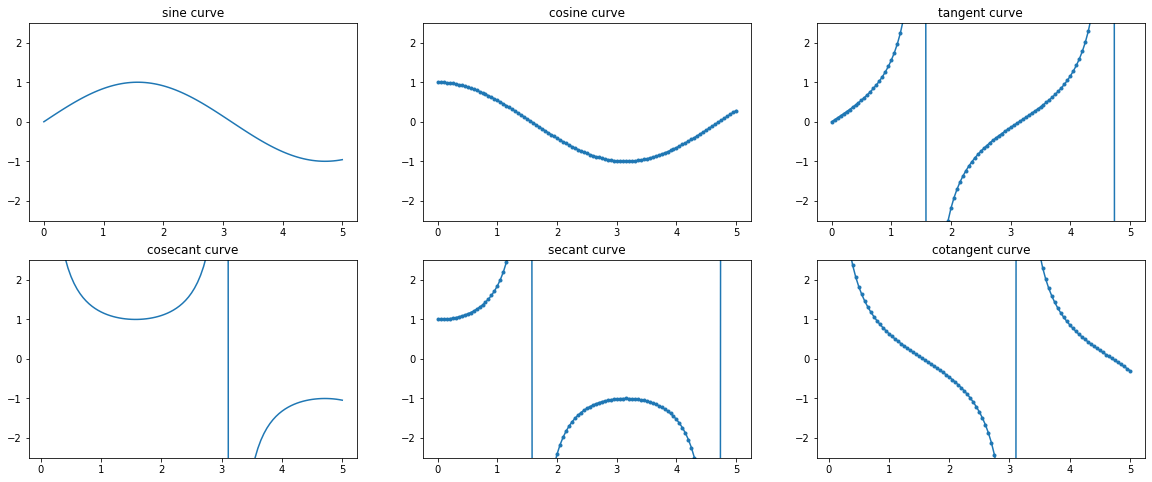

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 5.0, 101)

y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = 1/np.sin(x)
y5 = 1/np.cos(x)
y6 = 1/np.tan(x)

plt.figure(figsize=(20,8))

plt.subplot(2, 3, 1)
plt.plot(x, y1, '-')
plt.ylim(-2.5,2.5)
plt.title('sine curve')

plt.subplot(2, 3, 2)
plt.plot(x, y2, '.-')
plt.ylim(-2.5,2.5)
c
plt.subplot(2, 3, 3)
plt.plot(x, y3, '.-')
plt.ylim(-2.5,2.5)
plt.title('tangent curve')

plt.subplot(2, 3, 4)
plt.plot(x, y4, '-')
plt.ylim(-2.5,2.5)
plt.title('cosecant curve')

plt.subplot(2, 3, 5)
plt.plot(x, y5, '.-')
plt.ylim(-2.5,2.5)
plt.title('secant curve')

plt.subplot(2, 3, 6)
plt.plot(x, y6, '.-')
plt.ylim(-2.5,2.5)
plt.title('cotangent curve')

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, cohen_kappa_score, ConfusionMatrixDisplay
# data
c = 'cat'
f = 'fish'
h = 'hen'
actual    = np.array([c,c,c,c,c,c,f,f,f,f,f,f,f,f,f,f,h,h,h,h,h,h,h,h,h])
predicted = np.array([c,c,c,c,f,h,c,c,c,c,c,c,f,f,h,h,c,c,c,h,h,h,h,h,h])

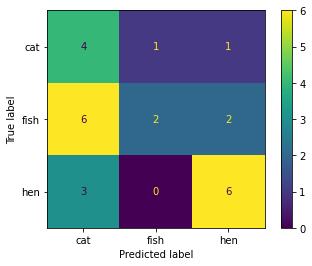

In [3]:
cm = confusion_matrix(actual,predicted)
display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=[c,f,h])
display.plot()

In [4]:
confusion_matrix(actual,predicted)

array([[4, 1, 1],
       [6, 2, 2],
       [3, 0, 6]])

In [5]:
# 1.1. 필요한 모듈 import 하기
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm`
from sklearn.linear_model import SGDClassifier, LogisticRegression # _sgd,  _lr

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score

# 1.2. 데이터 준비
digits = load_digits()


# 1.3. 데이터 이해하기
digits_data = digits.data
digits_label = digits.target

# 1.4. train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_stan = scaler.transform(X_train)
X_test_stan = scaler.transform(X_test)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.transform(X_test)

# 1.5. 다양한 모델로 학습시켜보기
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
# logistic regerssion
# _lr
# logistic_model = LogisticRegression() # convergence warning
# logistic_model.fit(X_train, y_train)
# y_pred_lr = logistic_model.predict(X_test) 
logistic_model = LogisticRegression() # no convergence warning
logistic_model.fit(X_train_stan, y_train)
y_pred_lr = logistic_model.predict(X_test_stan) 
# logistic_model = LogisticRegression() # convergence warning
# logistic_model.fit(X_train_norm, y_train)
# y_pred_lr = logistic_model.predict(X_test_norm)

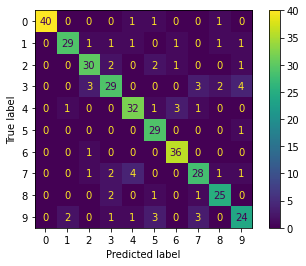

In [6]:
cm1 = confusion_matrix(y_test,y_pred_dt)
display1 = ConfusionMatrixDisplay(confusion_matrix = cm1)
display1.plot()